# Credit card fraud dataset - Exporatory data analysis
This notebook will implement diferent techniques to perform EDA on a dataset of credit card transactions, where some are marked as fraud.
Original dataset is disponsible at: https://www.kaggle.com/datasets/mishra5001/credit-card

First, let's see how balanced is the dataset wrt the target variable.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200) # to see all the columns in output
pd.options.display.max_rows = 4000 # to see all the rows in the output

In [72]:
data_path = "data/application_data.csv"
data_raw = pd.read_csv(data_path)
data = data_raw.copy()

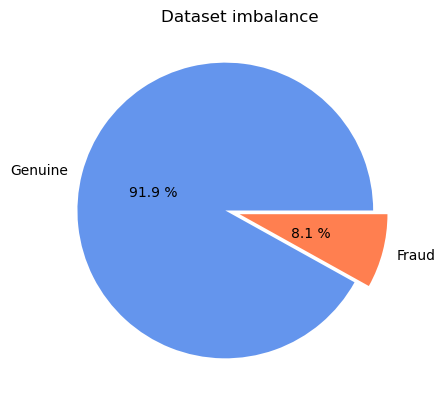

In [73]:
# checking for the imbalance of the target variable
target_counts = data.TARGET.value_counts()
fig = plt.figure()
plt.pie(target_counts.values, labels = ["Genuine", "Fraud"],
        pctdistance = 0.5, autopct = lambda p: "{:.1f} %".format(p),
        explode = [0.1, 0], colors = ["#6495ED", "#FF7F50"])
plt.title("Dataset imbalance")
plt.show()

Indeed the dataset is quite imbalanced with the overwhelming majority of records being genuine, non-fraud transactions. This is important to keep in mind because later on if we wanted to implement some machine learning techniques for prediction, appropriate evaluation metrics must be used as well as making sure that the train/test sets are balanced as well (stratified splitting).

## Initial overview and visualizations of data
Let's look at the data first to detect some potential anomalies/outliers. Also, let's see how many NaN values are present in the dataset.

In [74]:
data.shape

(307511, 122)

In [75]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [76]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [77]:
data.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

There are 307507 client records in the dataset and 120 features (+ID and target features).

At first glance there are already several things we can observe:
- dataset consists of both categorical and numeric features
- for some features there are extreme values present (comparing the max values to 75% percentile and std), e. g. AMT_INCOME_TOTAL, AMT_ANNUITY, DAYS_EMPLOYED...
- almost half of the features have a big amount of missing values (around 50 % of total amount of records)

First, let's drop the features which are missing values for more than 15 % of the records, so that later on when dropping NaN values we will still retain majority of the records.

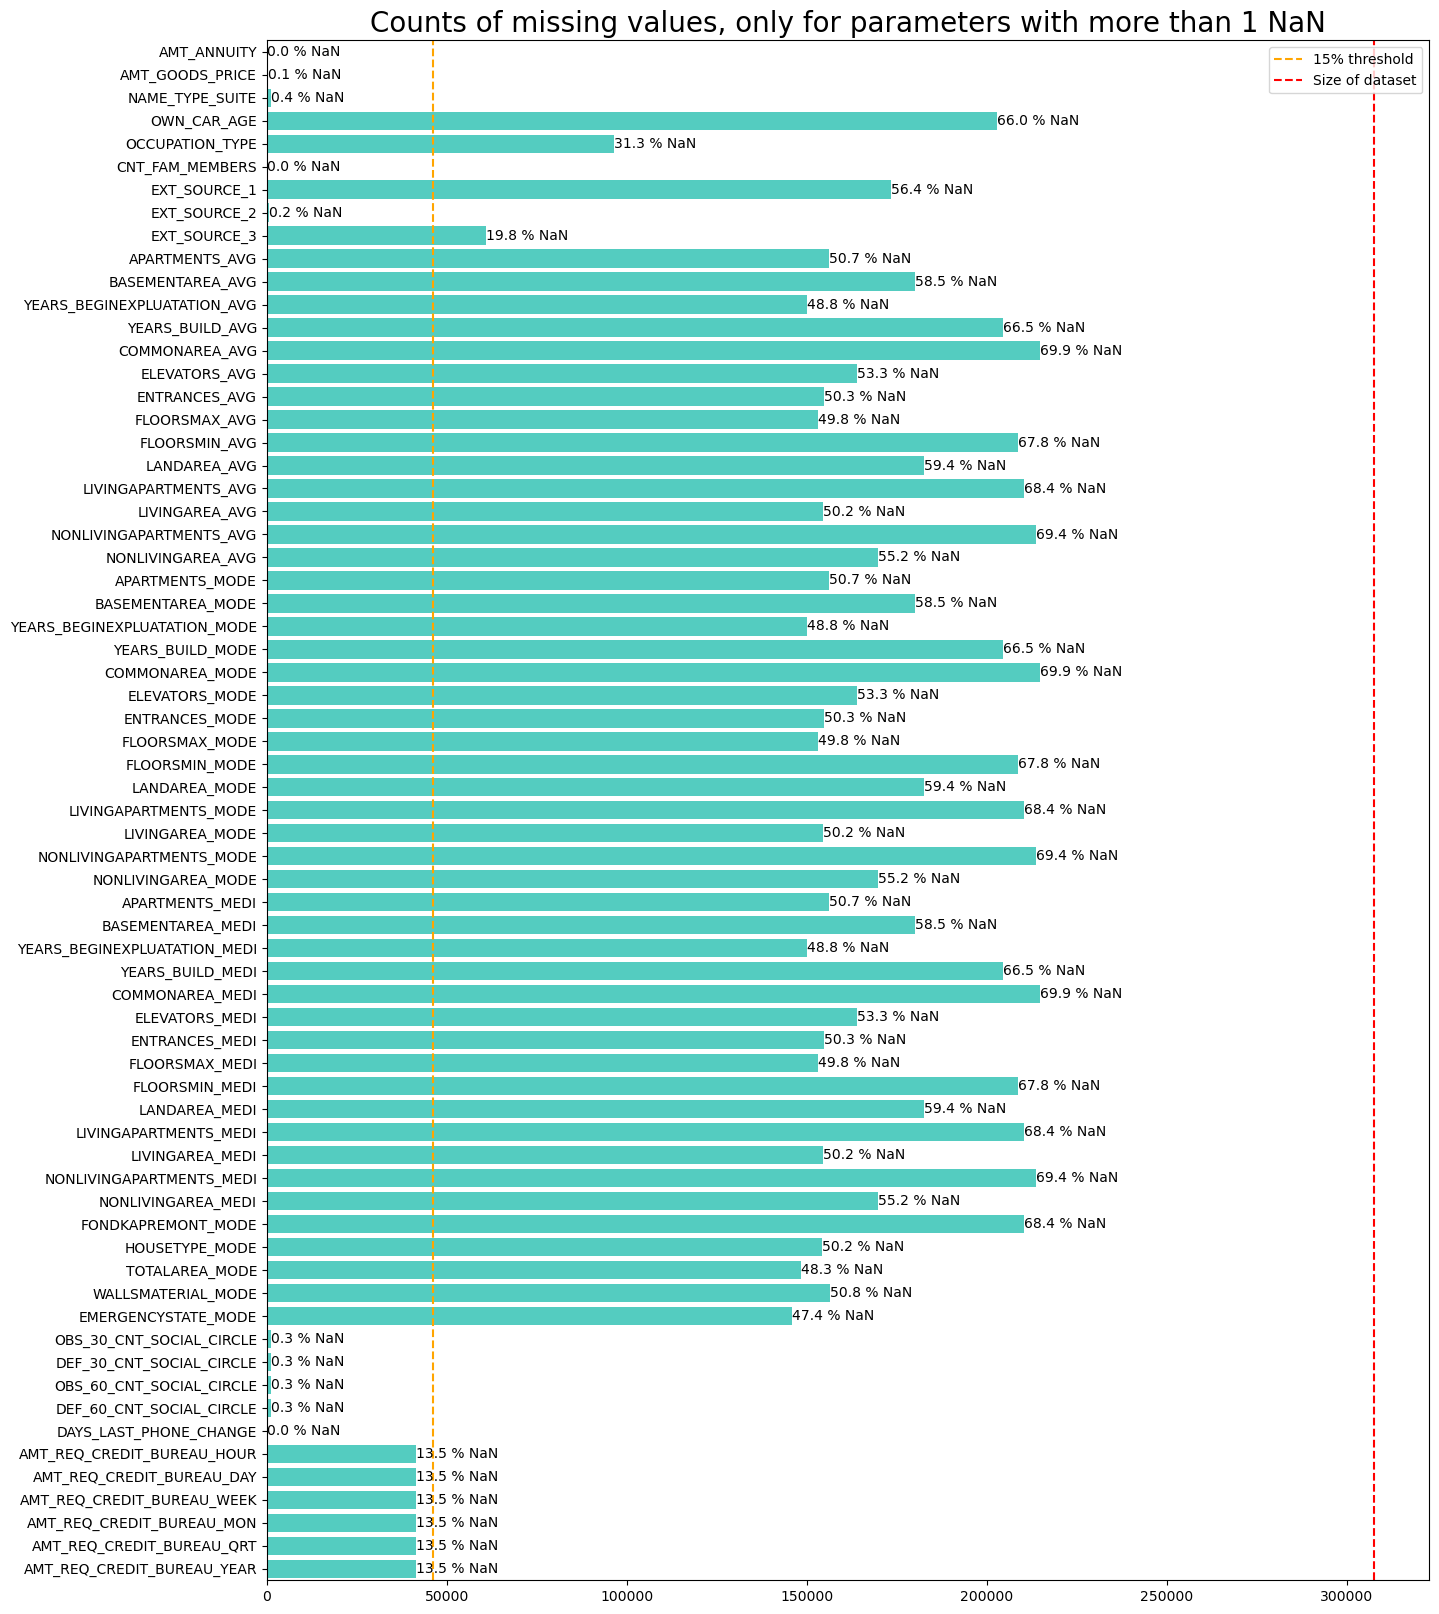

In [78]:
na_counts = data.isna().sum()
missing_idx = na_counts > 0
missing_cols = na_counts.loc[missing_idx.values]
missing_perc = missing_cols.values / data.shape[0]
barlabs = [f"{i} % NaN" for i in np.round(missing_perc * 100, 1)]
th15 = data.shape[0] * 0.15     # number of NaN values at 15% threshold

fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(15)
ax = sns.barplot(x = missing_cols.values, y = missing_cols.keys(), color = "turquoise")
ax.bar_label(ax.containers[0], labels = barlabs)
plt.title("Counts of missing values, only for parameters with more than 1 NaN", size = 20)
l15 = ax.axvline(x = th15, ymin = 0, ymax = 1, ls = "--", color = "orange")
lmax = ax.axvline(x = data.shape[0], ymin = 0, ymax = 1, ls = "--", color = "red")
plt.legend([l15, lmax], ["15% threshold", "Size of dataset"], loc = 1)
plt.show()

In [79]:
features_under15 = data.columns[data.isna().sum() < th15]
data_under15 = data[features_under15]
data_clean = data_under15.dropna()    # dropping the remaning NaN values

Now let's inspect the distributions of numerical continous variables. Seems like there are still some integer-looking features, those I will remove manually.

In [80]:
data_clean_cont = data_clean.select_dtypes(include = np.float64)
data_clean_cont = pd.concat([data_clean.iloc[:, :2], data_clean_cont], axis = 1) # adding back the taget and id columns
data_clean_cont = data_clean_cont.drop(labels = ["CNT_FAM_MEMBERS",    # removing the integer-looking features by name
                               "OBS_30_CNT_SOCIAL_CIRCLE",
                               "DEF_30_CNT_SOCIAL_CIRCLE",
                               "DEF_60_CNT_SOCIAL_CIRCLE",
                               "OBS_60_CNT_SOCIAL_CIRCLE",
                               "AMT_REQ_CREDIT_BUREAU_HOUR",
                               "AMT_REQ_CREDIT_BUREAU_DAY",
                               "AMT_REQ_CREDIT_BUREAU_WEEK",
                               "AMT_REQ_CREDIT_BUREAU_MON",
                               "AMT_REQ_CREDIT_BUREAU_QRT",
                               "AMT_REQ_CREDIT_BUREAU_YEAR"], axis = 1)

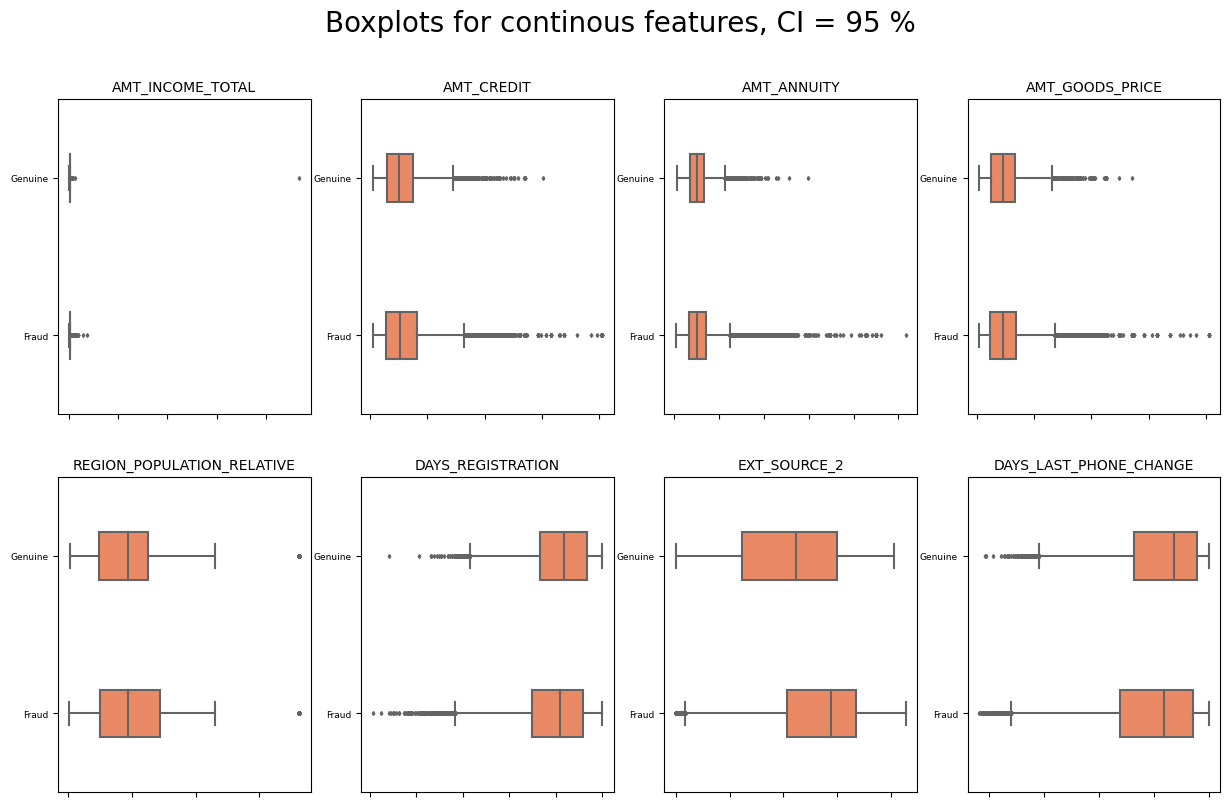

In [81]:
fig, axs = plt.subplots(2, 4)
fig.set_figwidth(15)
fig.set_figheight(9)
fig.suptitle("Boxplots for continous features, CI = 95 %", size = 20)
for i, f in enumerate(data_clean_cont.columns[2:]):
    row = int(i > 3)
    col = i % 4
    sns.boxplot(data = data_clean_cont, x = f, y = data_clean_cont.TARGET.astype(str), ax = axs[row, col],
                width = 0.3, color = "#FF7F50", fliersize = 2) 
    axs[row, col].set_title(f, size = 10)
    axs[row, col].set_xlabel(None)
    axs[row, col].set_ylabel(None)
    axs[row, col].set_yticks([0, 1], labels = ["Genuine", "Fraud"], size = 6.5)
    axs[row, col].tick_params(labelbottom = False)
plt.show()

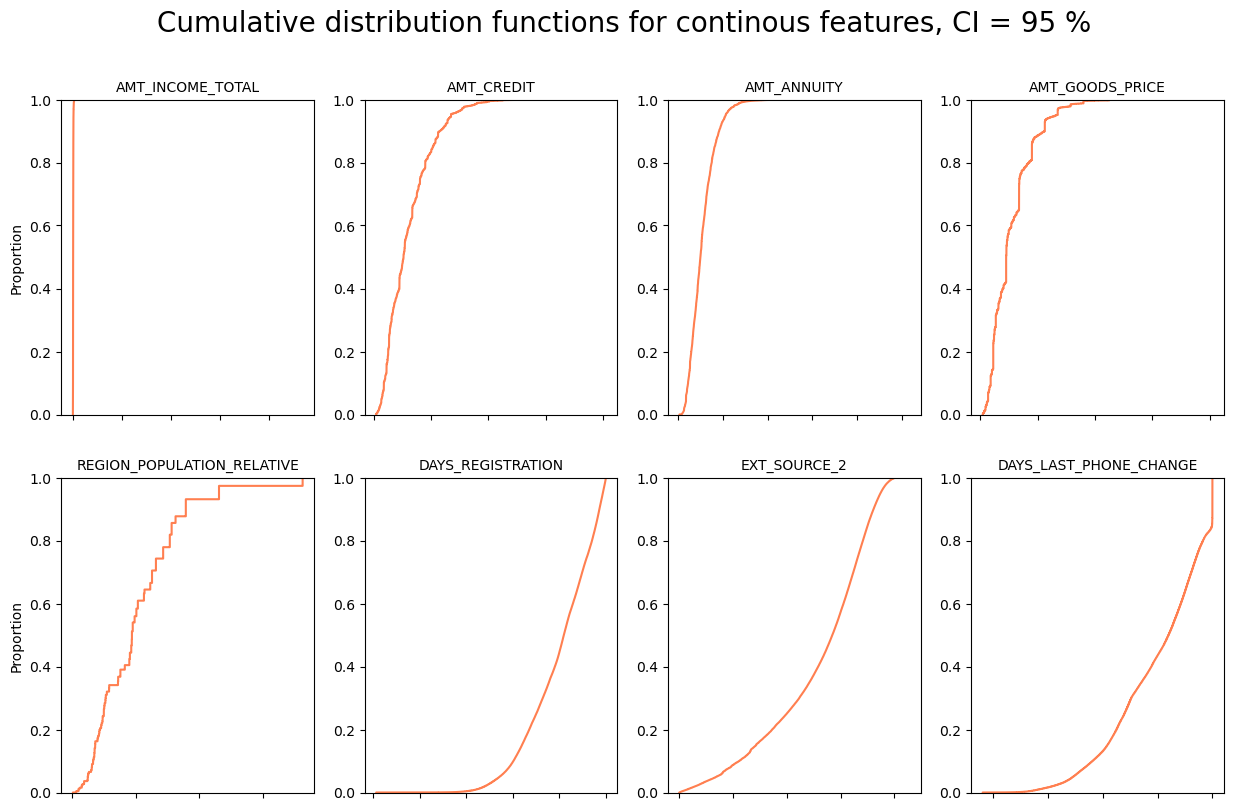

In [82]:
fig, axs = plt.subplots(2, 4)
fig.set_figwidth(15)
fig.set_figheight(9)
fig.suptitle("Cumulative distribution functions for continous features, CI = 95 %", size = 20)
for i, f in enumerate(data_clean_cont.columns[2:]):
    row = int(i > 3)
    col = i % 4
    sns.ecdfplot(data = data_clean_cont, x = f, ax = axs[row, col],
                color = "#FF7F50") 
    axs[row, col].set_title(f, size = 10)
    axs[row, col].set_xlabel(None)
    if i % 4 != 0:
        axs[row, col].set_ylabel(None)
    axs[row, col].tick_params(labelbottom = False)
plt.show()

By looking at the histograms and CDF plots we can see that:
- AM_TOTAL_INCOME has one extreme outlier
- aside from REGION_POPULATION_RELATIVE and EXT_SOURCE_2, data seems to have a lot of outliers
- most of the features don't seem to be normally distributed as they are mostly skewed towards the one tail

Lastly let's inspect the correlation (Pearson) matrix:

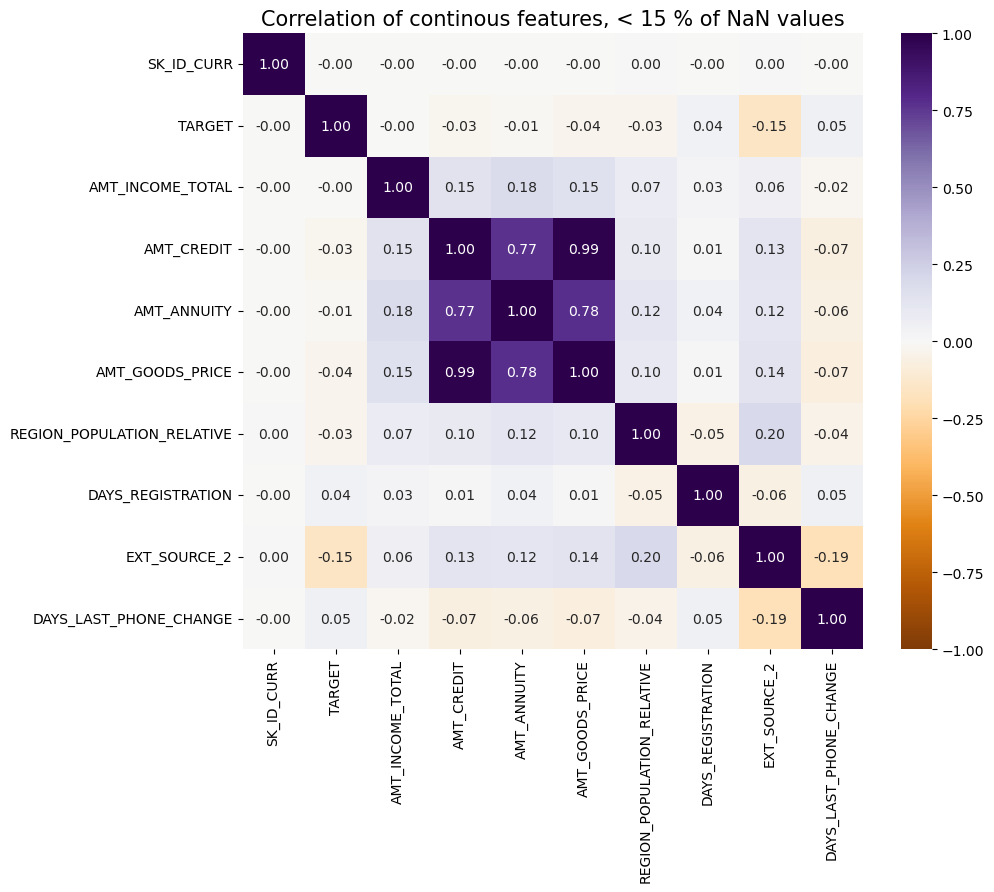

In [83]:
fig = plt.figure()
plt.title("Correlation of continous features, < 15 % of NaN values", size = 15)
fig.set_figheight(8)
fig.set_figwidth(10)
sns.heatmap(data = data_clean_cont.corr(), cmap = "PuOr", annot = True, fmt = ".2f", vmin = -1, vmax = 1)
plt.show()

We can see that the credit amount of the loan, loan annuity and the price of good for which the loan is given are strongly positively correlated, which makes sense. In case of applying machine learning predictors we would only retain one of the features, as others would unnecessarily introduce more dimension to the dataset without adding any new information.

Now let's have a look at some categorical features. First we can look at all the different categories for each feature.

In [84]:
data_categ = data_clean.select_dtypes(include = object)
data_categ = pd.concat([data_clean.iloc[:, :2], data_categ], axis = 1) # adding back the taget and id columns
for f in data_categ.columns[2:]:
    print(data_categ[f].value_counts())
    print("-------------")

NAME_CONTRACT_TYPE
Cash loans         239559
Revolving loans     23864
Name: count, dtype: int64
-------------
CODE_GENDER
F      174573
M       88846
XNA         4
Name: count, dtype: int64
-------------
FLAG_OWN_CAR
N    171728
Y     91695
Name: count, dtype: int64
-------------
FLAG_OWN_REALTY
Y    182203
N     81220
Name: count, dtype: int64
-------------
NAME_TYPE_SUITE
Unaccompanied      214418
Family              34276
Spouse, partner      9577
Children             2764
Other_B              1457
Other_A               708
Group of people       223
Name: count, dtype: int64
-------------
NAME_INCOME_TYPE
Working                 135700
Commercial associate     61110
Pensioner                47272
State servant            19320
Student                     14
Businessman                  4
Unemployed                   2
Maternity leave              1
Name: count, dtype: int64
-------------
NAME_EDUCATION_TYPE
Secondary / secondary special    186066
Higher education                  6

So we have in total 11 categorical features from which 4 are binary, 6 have anywhere between 5 to 8 categories and one features which has more than 50 different categories. Let's explore whether there is some relationship between them and the target variable.

In [85]:
# there are 4 XNA entries in gender feature, removing them
data_categ = data_categ[data_categ.CODE_GENDER != 'XNA']

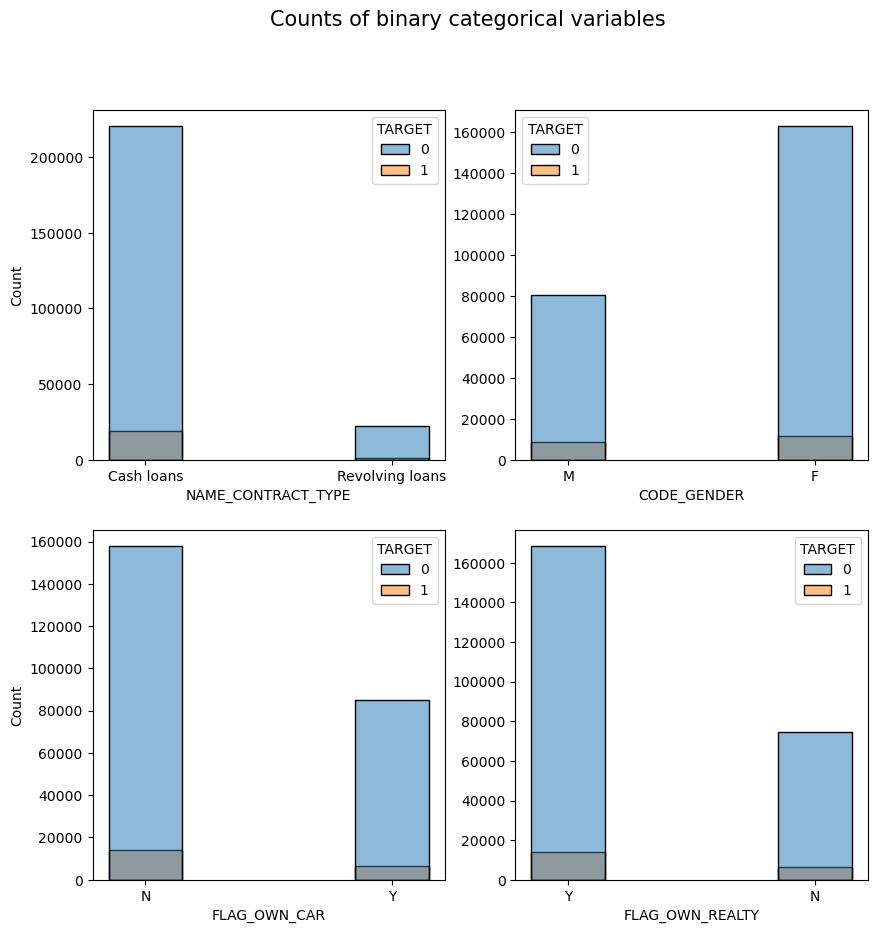

In [86]:
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(10)
fig.set_figheight(10)
fig.suptitle("Counts of binary categorical variables", size = 15)
for i, f in enumerate(data_categ.columns[2:6]):
    r = int(i > 1)
    c = i % 2
    sns.histplot(data = data_categ, x = f, hue = "TARGET", ax = axs[r, c], shrink = 0.3)
    if c:
        axs[r, c].set(ylabel = None)
plt.show()  

By inspecting histograms abovewe can see that the heights of bars for the CODE_GENDER are not proportional between male and female wrt the target variable. Let's inspect it a bit more.

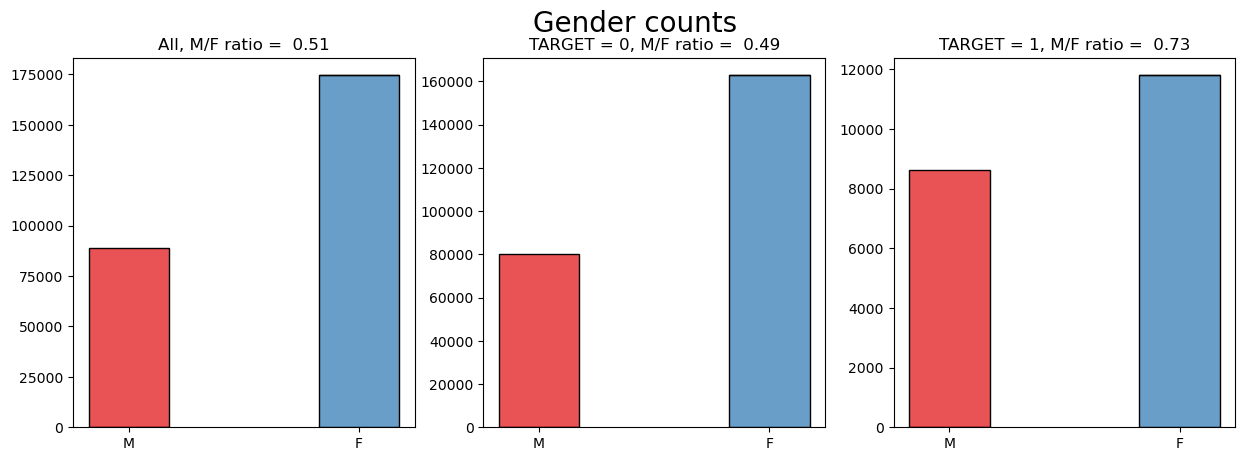

In [87]:
neg = data_categ[data_categ.TARGET == 0].copy()
pos = data_categ[data_categ.TARGET == 1].copy()
neg["CODE_GENDER"] = pd.Categorical(neg["CODE_GENDER"], ["M", "F"])    # to attain the same bar order in histplot for negative

fig, axs = plt.subplots(1, 3)
fig.set_figwidth(15)
fig.suptitle("Gender counts", size = 20)

sns.histplot(data = data_categ, x = "CODE_GENDER", ax = axs[0], hue = "CODE_GENDER",
             palette = "Set1", shrink = 0.35, legend = False, multiple = "stack")
axs[0].set(xlabel = None)
axs[0].set(ylabel = None)
mf_all = np.sum(data_categ.CODE_GENDER == "M") / np.sum(data_categ.CODE_GENDER == "F")
axs[0].set_title(f"All, M/F ratio =  {mf_all:.2f}")

sns.histplot(data = neg, x = "CODE_GENDER", ax = axs[1], hue = "CODE_GENDER",
             palette = "Set1", shrink = 0.35, legend = False, multiple = "stack")
axs[1].set(xlabel = None)
axs[1].set(ylabel = None)
mf_neg = np.sum(neg.CODE_GENDER == "M") / np.sum(neg.CODE_GENDER == "F")
axs[1].set_title(f"TARGET = 0, M/F ratio =  {mf_neg:.2f}")

sns.histplot(data = pos, x = "CODE_GENDER", ax = axs[2], hue = "CODE_GENDER",
             palette = "Set1", shrink = 0.35, legend = False, multiple = "stack")
axs[2].set(xlabel = None)
axs[2].set(ylabel = None)
mf_pos = np.sum(pos.CODE_GENDER == "M") / np.sum(pos.CODE_GENDER == "F")
axs[2].set_title(f"TARGET = 1, M/F ratio =  {mf_pos:.2f}")

plt.show()

There is a visible increase of males in the positive group. Now let's compare the multivariate categories.

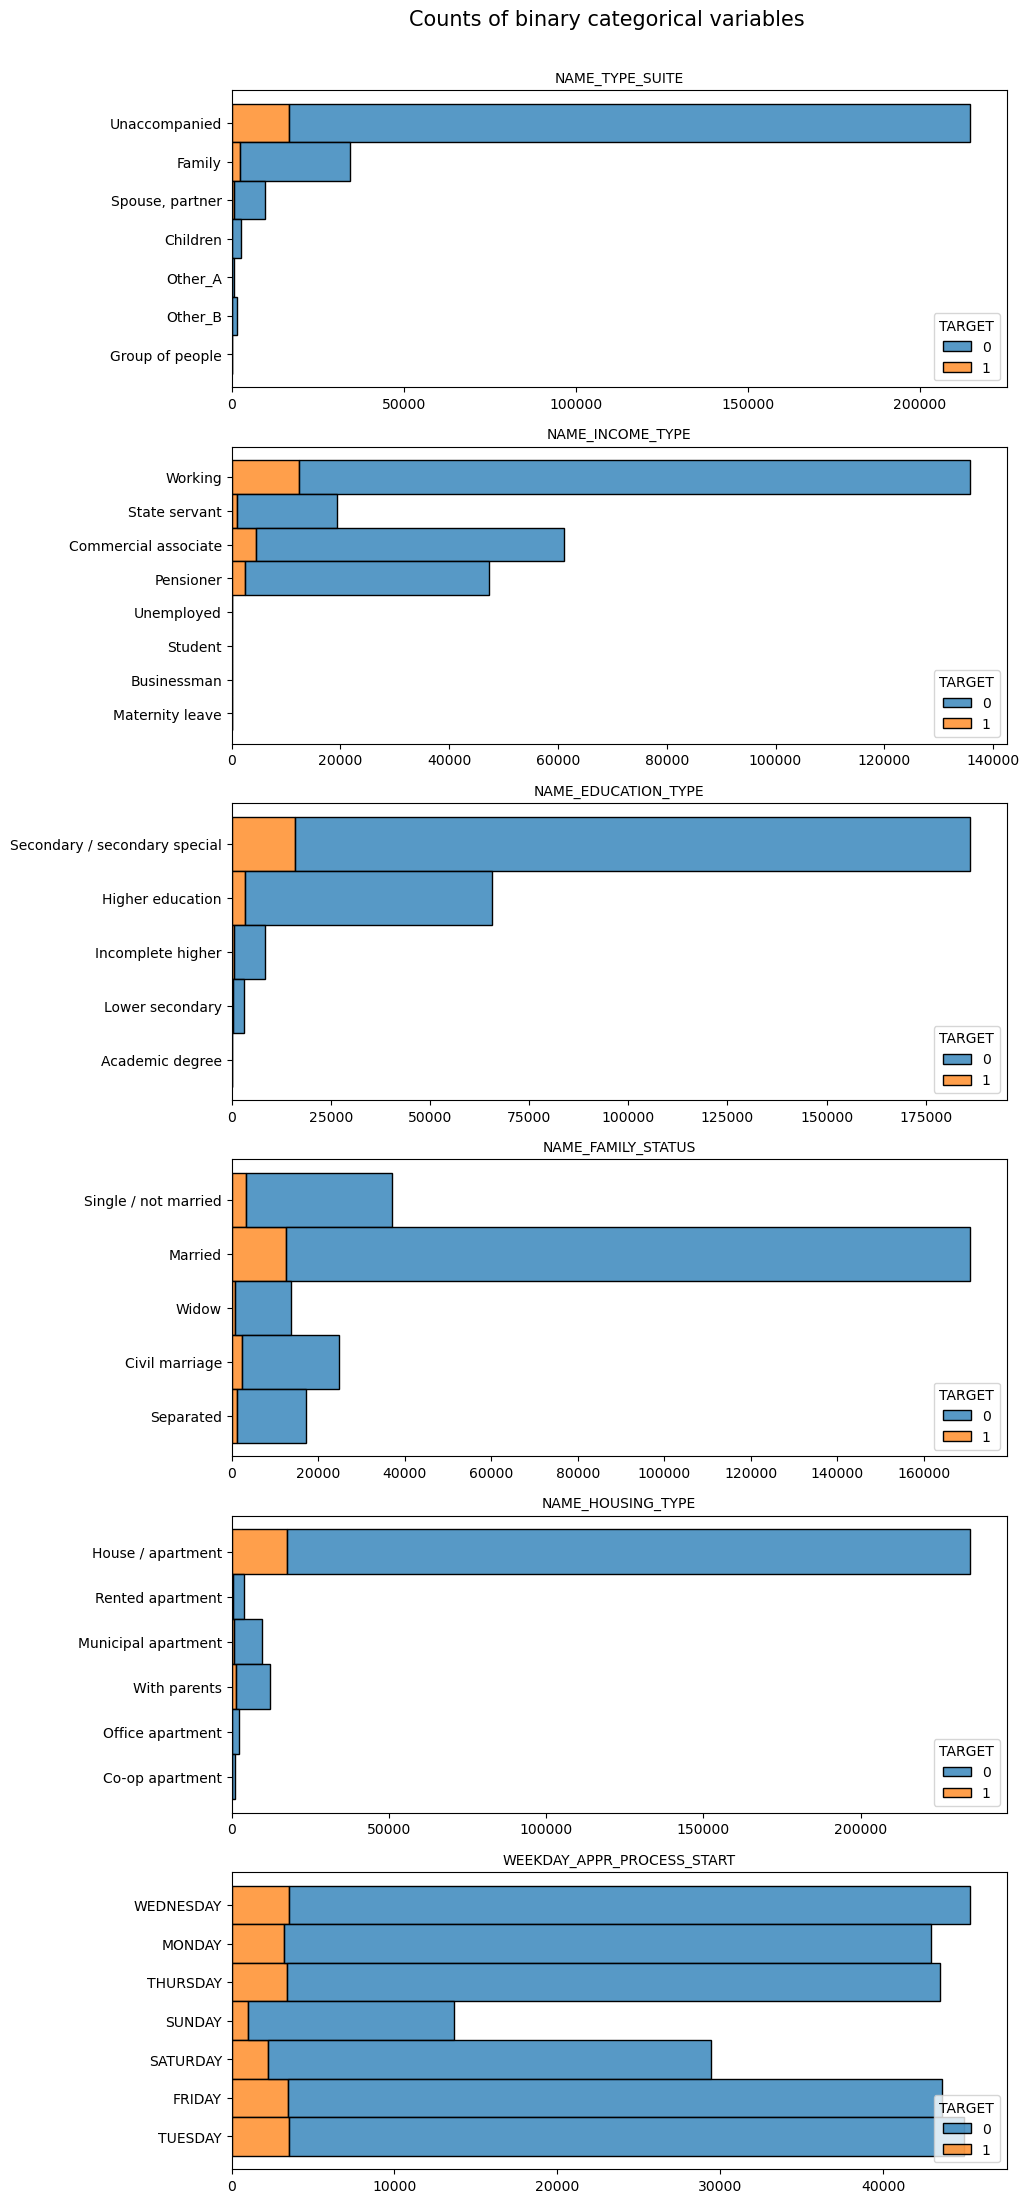

In [88]:
fig, axs = plt.subplots(6, 1)
fig.set_figwidth(10)
fig.set_figheight(27)
fig.suptitle("Counts of binary categorical variables", size = 15, y = 0.91)
for i, f in enumerate(data_categ.columns[6:12]):
    sns.histplot(data = data_categ, y = f, hue = "TARGET", ax = axs[i], multiple = "stack")
    sns.move_legend(axs[i], loc = "lower right")
    barlabs = data_categ[f].value_counts().values
    axs[i].set_title(f, size = 10)
    axs[i].set(xlabel = None)
    axs[i].set(ylabel = None)
plt.show()  